In [3]:
import timm
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from pathlib import Path
from fastai.vision.all import *
from fastcore.parallel import *

In [4]:
import zipfile
with zipfile.ZipFile("drive/MyDrive/data.zip","r") as zip_ref:
    zip_ref.extractall(".")

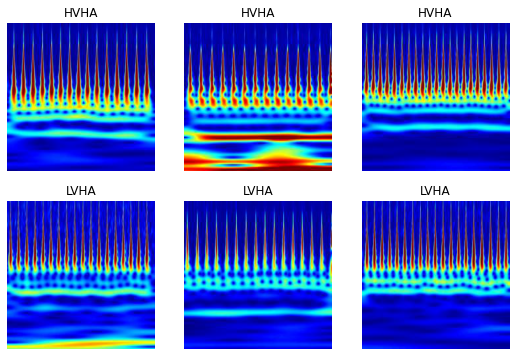

In [5]:
dls = ImageDataLoaders.from_folder("data", valid_pct=0.2, seed=42)
dls.show_batch(max_n=6)

In [6]:
learn = vision_learner(dls, 'resnet26d', metrics=accuracy, path='.').to_fp16()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet26d-69e92c46.pth" to /root/.cache/torch/hub/checkpoints/resnet26d-69e92c46.pth


SuggestedLRs(valley=0.005248074419796467, slide=0.0063095735386013985)

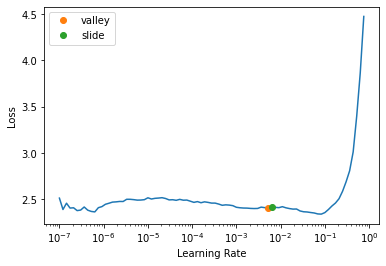

In [7]:
learn.lr_find(suggest_funcs=(valley, slide))

In [8]:
learn.fit_one_cycle(100, 0.005)

epoch,train_loss,valid_loss,accuracy,time
0,1.997147,1.402159,0.409254,00:31
1,1.572425,1.240123,0.485624,00:31
2,1.311225,1.189198,0.507637,00:31
3,1.126782,1.175604,0.504043,00:30
4,1.004561,1.180835,0.505840,00:30
5,0.924997,1.119305,0.519766,00:32
6,0.864438,1.115125,0.535040,00:31
7,0.840246,1.124080,0.524708,00:30
8,0.780973,1.155387,0.538185,00:30
9,0.755541,1.149114,0.532345,00:30


In [10]:
learn.save('/content/drive/MyDrive/models/model')

Path('/content/drive/MyDrive/models/model.pth')